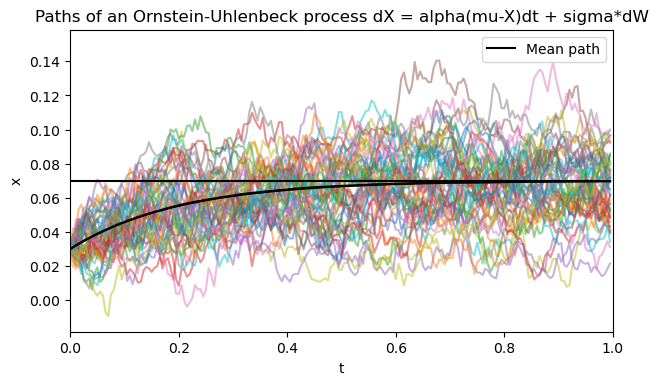

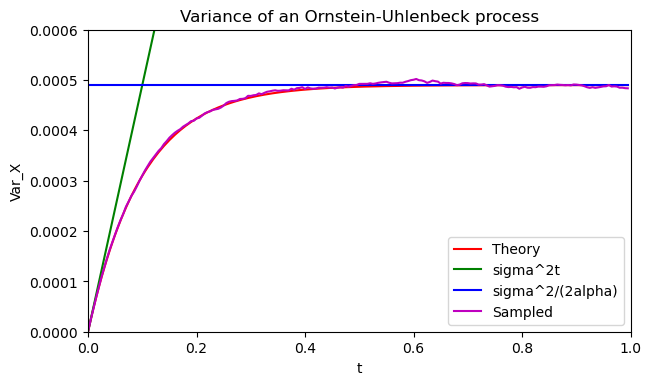

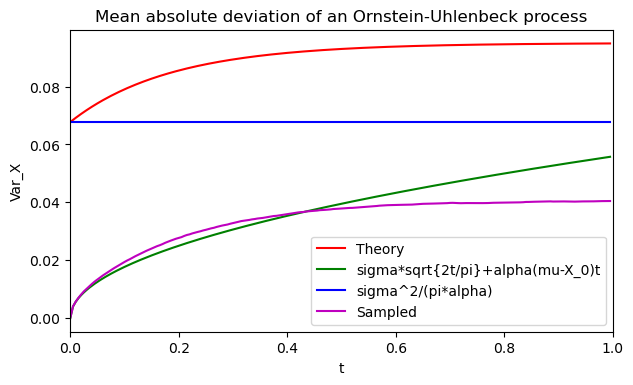

TypeError: _correlate_dispatcher() missing 1 required positional argument: 'v'

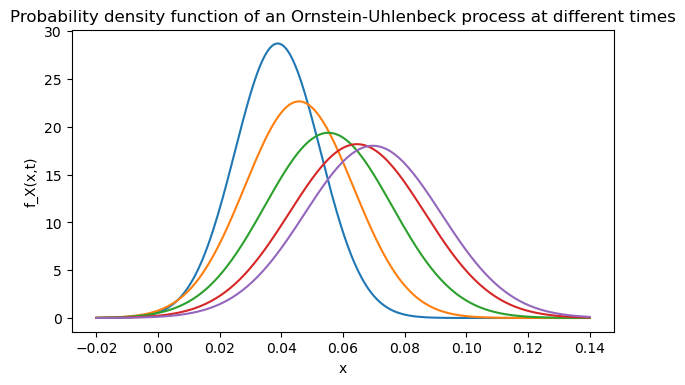

In [40]:
#!/usr/bin/python3
#Ornstein_Uhlenbeck_process_withEM_AM.ipynb
#Parth Parakh
#purpose: Simulate an Ornstein-Uhlenbeck process
#dX = alpha*(mu-X)*dt + sigma*dW

#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#----------------------------------------------------------------------

#Defining the parameters
npaths = 20000;           #number of paths
T = 1;                   #time horizon
nsteps = 200;            #number of time steps
dt = T/nsteps;           #time step
t = np.arange(0,T,dt);   #observation times
alpha = 5; mu = 0.07; sigma = 0.07; #model parameters
X0 = 0.03;

#model preparation
X = np.zeros(npaths*nsteps).reshape(nsteps,npaths);
X[0,:] = 0.03;
N = np.random.normal(0,1,(nsteps,npaths));
SDev = sigma*np.sqrt((1-np.exp(-2*alpha*dt))/(2*alpha));

for i in range(0,nsteps-1):
    X[i+1,:] = mu+(X[i,:]-mu)*np.exp(-alpha*dt) + SDev*N[i,:];
    
EX = mu+(X0-mu)*np.exp(-alpha*t);

#----------------------------------------------------------------------
#plot expected and sample paths
plot1 = plt.figure(1,figsize=(7,4), dpi=100)
for i in range(0,50):
    plt.plot(t,X[:,i],alpha=0.5)
plt.plot(t,EX,'black', label = 'Mean path')
plt.plot(t,np.mean(X,axis=1),'black');
plt.plot(t,mu*np.ones(len(t)),'black')
sdevinfty = sigma/np.sqrt(2*alpha);
plt.ylim(mu-4*sdevinfty,mu+4*sdevinfty)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Paths of an Ornstein-Uhlenbeck process dX = alpha(mu-X)dt + sigma*dW')
plt.show()

#----------------------------------------------------------------------
s = ((sigma**2)/(2*alpha));
st = s*np.ones(len(t));
plot2 = plt.figure(2,figsize=(7,4), dpi=100)
plt.plot(t,((sigma**2)/(2*alpha))*(1-np.exp(-2*alpha*t)),'red',label = 'Theory')
plt.plot(t,((sigma**2)*t),'green',label = 'sigma^2t')
plt.plot(t,(st),'blue',label = 'sigma^2/(2alpha)')
plt.plot(t,np.var(X,ddof=0,axis=1),'m',label = 'Sampled')
plt.ylim(0,0.0006)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('Var_X')
plt.title('Variance of an Ornstein-Uhlenbeck process')
plt.show()

#----------------------------------------------------------------------
s = sigma*np.sqrt(1-((np.exp(-2*alpha*t))/(np.pi*alpha)))+np.sqrt(np.pi/2)*(mu-X0)*(1-np.exp(-alpha*t))/2
st =((sigma/np.sqrt(np.pi*alpha))+(np.sqrt(np.pi/2)*(mu-X0)))*np.ones(len(t))
plot3 = plt.figure(3,figsize=(7,4), dpi=100)
plt.plot(t,s,'red',label = 'Theory')
plt.plot(t,sigma*np.sqrt(2*t/np.pi),'green',label = 'sigma*sqrt{2t/pi}+alpha(mu-X_0)t')
plt.plot(t,(st),'blue',label = 'sigma^2/(pi*alpha)')
plt.plot(t,np.mean(np.abs(X-X0),axis=1),'m',label = 'Sampled')
#plt.ylim(0,0.0006)
plt.xlim(0,1)
plt.legend()
plt.xlabel('t')
plt.ylabel('Var_X')
plt.title('Mean absolute deviation of an Ornstein-Uhlenbeck process')
plt.show()

#----------------------------------------------------------------------
x = np.linspace(-0.02,0.14,200);
t2 = np.array([0.05,0.1,0.2,0.4,1]);
EX2 = mu+((X0-mu)*np.exp(-alpha*t2));
sdev = sigma*np.sqrt((1-np.exp(-2*alpha*t2))/(2*alpha));
f = np.zeros(len(x)*len(t2)).reshape(len(x),len(t2));
for i in range(0,len(t2)):
    f[:,i] = norm.pdf(x,EX2[i],sdev[i]);
    
plot4 = plt.figure(4,figsize=(7,4), dpi=100)
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f_X(x,t)')
plt.title('Probability density function of an Ornstein-Uhlenbeck process at different times')

#----------------------------------------------------------------------
s = ((sigma**2)/(2*alpha));
st = s*np.ones(len(t));
C = np.zeros((2*nsteps+1)*npaths).reshape((2*nsteps+1),npaths);
for j in range(0,npaths-1):
    C[:,j] = np.correlate(X[:,j]-EX,mode='same');
C = np.mean(C,1);
plot5 = plt.figure(5,figsize=(7,4), dpi=100)
plt.plot(t,(sigma**2/(2*alpha))*exp(-alpha*t),'r');
plt.plot(t,C[nsteps+1:],'b');
plt.plot(t,s*np.ones(len(t)),'g');
plt.plot(t,np.mean(np.var(X,0,2))*np.ones(len(t)),'c');
plt.xlabel('tau')
plt.ylabel('C(tau)')
#legend('Theory','Sampled','Var for infinite t','Average sampled Var','Location','East')
plt.title('Autocovariance function of an Ornstein-Uhlenbeck process')

#----------------------------------------------------------------------
plot6 = plt.figure(5,figsize=(7,4),dpi=100)
plt.plot(t,np.exp(-alpha*t),'r');
plt.plot(t,C[nsteps+1:]/C[nsteps+1],'b');
plt.xlabel('tau')
plt.ylabel('c(tau)')
#plt.legend('Theory','Sampled')
plt.title('Autocorrelation function of an Ornstein-Uhlenbeck process')